### Here we plot the cosine similarities as a function of the number of mutations, with the normalisation using original SARS-cov2 sequence trinucleotide content and the average between the original and the mutated one.

In [1]:
# imports
import json
from collections import defaultdict

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial.distance import cosine
from pathlib import Path  # to save the mutational table 

Starting with 100 mutations and sbs20 signature here.

In [2]:
cosine_sim_100 = pd.read_table('../results/results_sbs20/100_mut/cosine_sim_100.tsv')
cosine_sim_100.head(10)

,Condition,Cosine similarity
0,once normed,0.799215
1,av once normed,0.799741
2,twice normed,0.864222
3,av twice normed,0.863984


In [3]:
# then 500 mutations
cosine_sim_500 = pd.read_table('../results/results_sbs20/500_mut/cosine_sim_500.tsv')
cosine_sim_500.head(10)

,Condition,Cosine similarity
0,once normed,0.963816
1,av once normed,0.963569
2,twice normed,0.939289
3,av twice normed,0.942863


In [4]:
# then 1000 mutations
cosine_sim_1000 = pd.read_table('../results/results_sbs20/1000_mut/cosine_sim_1000.tsv')
cosine_sim_1000.head(10)

,Condition,Cosine similarity
0,once normed,0.952393
1,av once normed,0.955565
2,twice normed,0.906577
3,av twice normed,0.914540


In [5]:
# and finally 5000 mutations
cosine_sim_5000 = pd.read_table('../results/results_sbs20/5000_mut/cosine_sim_5000.tsv')
cosine_sim_5000.head(10)

,Condition,Cosine similarity
0,once normed,0.964636
1,av once normed,0.986803
2,twice normed,0.873416
3,av twice normed,0.918649


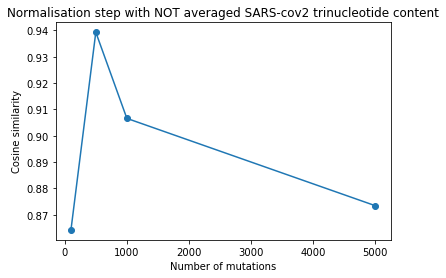

In [6]:
# Plot the not averaged ones through time 

not_av = [cosine_sim_100[cosine_sim_100.Condition == 'twice normed']['Cosine similarity'].values, cosine_sim_500[cosine_sim_500.Condition == 'twice normed']['Cosine similarity'].values, cosine_sim_1000[cosine_sim_1000.Condition == 'twice normed']['Cosine similarity'].values, cosine_sim_5000[cosine_sim_5000.Condition == 'twice normed']['Cosine similarity'].values]
time = [100, 500, 1000, 5000]

plt.plot(time, not_av, marker = 'o')
plt.xlabel("Number of mutations")
plt.ylabel("Cosine similarity")
plt.title("Normalisation step with NOT averaged SARS-cov2 trinucleotide content")
plt.show()

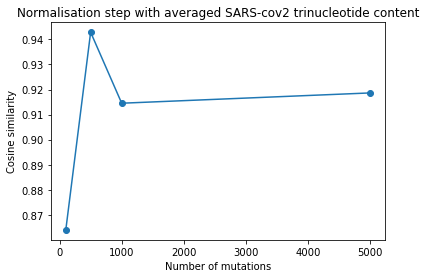

In [7]:
# Plot the averaged ones through time 

av = [cosine_sim_100[cosine_sim_100.Condition == 'av twice normed']['Cosine similarity'].values, cosine_sim_500[cosine_sim_500.Condition == 'av twice normed']['Cosine similarity'].values, cosine_sim_1000[cosine_sim_1000.Condition == 'av twice normed']['Cosine similarity'].values, cosine_sim_5000[cosine_sim_5000.Condition == 'av twice normed']['Cosine similarity'].values]
time = [100, 500, 1000, 5000]

plt.plot(time, av, marker = 'o')
plt.xlabel("Number of mutations")
plt.ylabel("Cosine similarity")
plt.title("Normalisation step with averaged SARS-cov2 trinucleotide content")
plt.show()

We can see that the averaged one is more stable through time, as the mutations accumulate. This makes sense since as mutations accumulate, the SARS-cov2 sequence diverges and so averaging the trinucleotide content helps maintaining a higher cosine similarity with the original mutational signature.